In [1]:
super <- read.table('./supermarket.txt', header=T)
t(super)

price,6.4,16.1,42.1,2.1,30.7,32.1,7.2,3.4,20.8,1.5
time,1.7,2.7,4.9,0.3,3.9,4.1,1.2,0.5,3.3,0.2


In [11]:
super.lm <- lm(time ~ price, data=super)
super.lm.summary <- summary(super.lm)
super.lm.summary


Call:
lm(formula = time ~ price, data = super)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37928 -0.32771 -0.04431  0.32231  0.56126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.396460   0.191488    2.07   0.0722 .  
price       0.115982   0.008979   12.92 1.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3925 on 8 degrees of freedom
Multiple R-squared:  0.9542,	Adjusted R-squared:  0.9485 
F-statistic: 166.9 on 1 and 8 DF,  p-value: 1.221e-06


In [3]:
# 절편(β₀)과 기울기(β₁)는 아래와 같다.
β0 <- super.lm.summary$coefficients[2, 1]
cat('β0 :', β0, '\n')
β1 <- super.lm.summary$coefficients[1, 1]
cat('β1 :', β1)

β0 : 0.1159815 
β1 : 0.3964597

In [14]:
# p-value가 0.05보다 작으면 유의 -> β₁(기울기) = 0이라는 귀무가설을 기각하고 유의한걸로 판정
super.lm.summary$coefficients[2,4]
super.lm.summary$coefficients[2,4] < 0.05

[1] 1.220793e-06

[1] TRUE

In [6]:
# 분산분석표의 F값을 통해서 회귀선이 유의한지 볼 수 있다 -> β₁(기울기) = 0이라는 귀무가설을 기각하고 유의한걸로 판정
super.lm.anova <- anova(super.lm)
super.lm.anova
super.lm.anova[1, 5] < 0.05

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
price,1,25.703598,25.7035980,166.852,1.220793e-06
Residuals,8,1.232402,0.1540502,NA,NA


[1] TRUE

In [7]:
# 회귀모형의 변수들 보기
names(super.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [8]:
# resid는 잔차이며 fitted는 추정값 이다.
cbind(super, super.lm$resid, super.lm$fitted)

,price,time,super.lm$resid,super.lm$fitted
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.4,1.7,0.56125840,1.138742
2,16.1,2.7,0.43623742,2.263763
3,42.1,4.9,-0.37928275,5.279283
4,2.1,0.3,-0.34002095,0.640021
5,30.7,3.9,-0.05709314,3.957093
6,32.1,4.1,-0.01946730,4.119467
7,7.2,1.2,-0.03152683,1.231527
8,3.4,0.5,-0.29079696,0.790797
9,20.8,3.3,0.49112416,2.808876


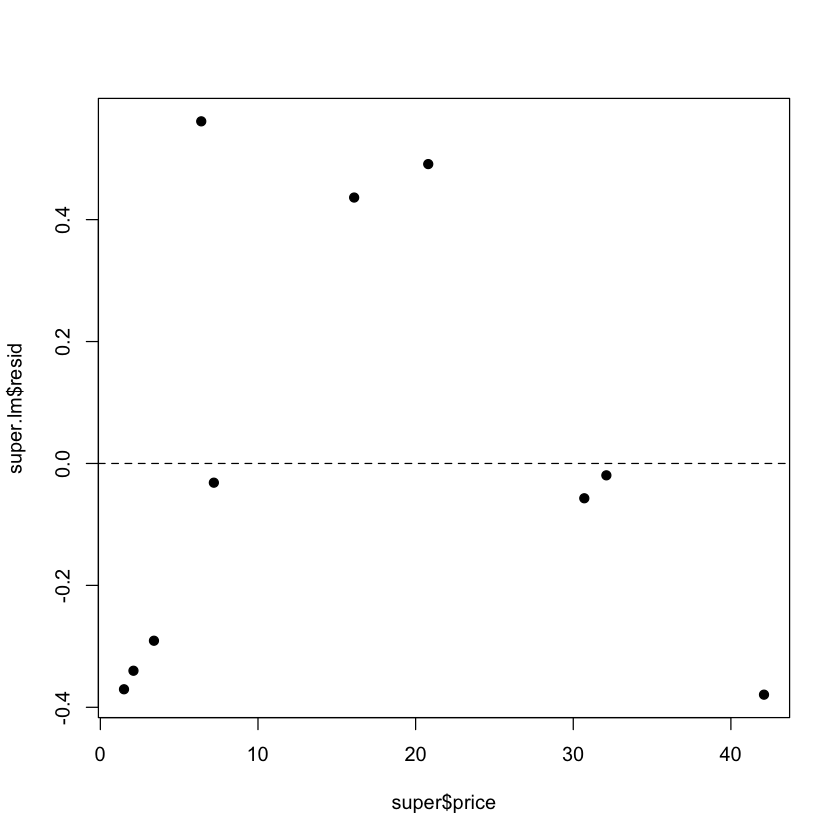

In [13]:
# 잔차그림 그리기
plot(super$price, super.lm$resid, pch=19)
abline(h=0, lty=2)

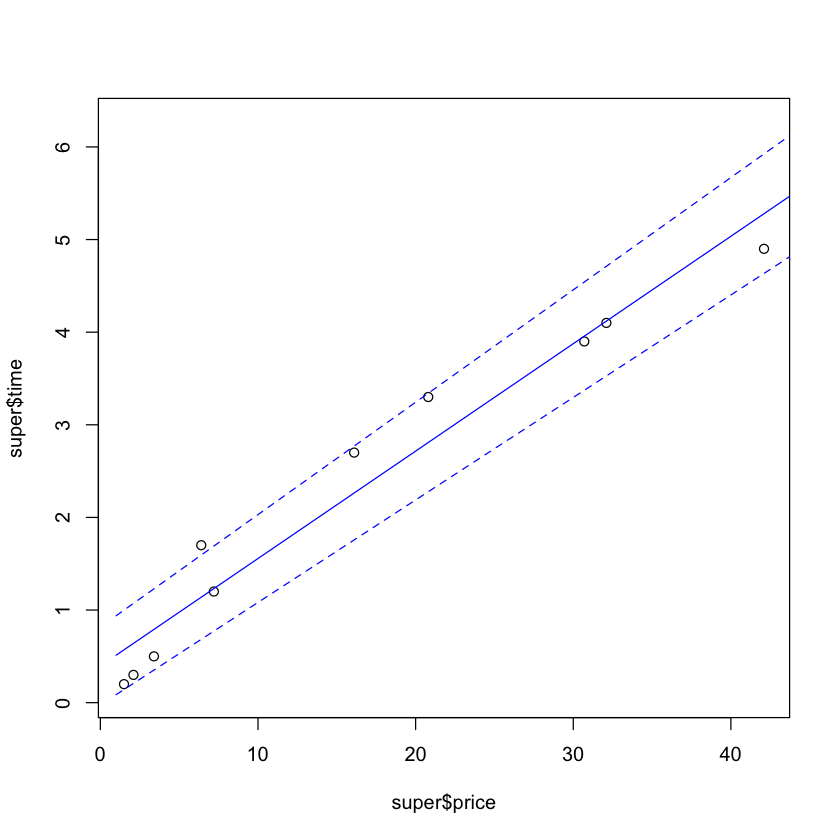

In [15]:
# 추정값의 신뢰대 그리기
p.x <- data.frame(price=c(1,45))
pc <- predict(super.lm, int='c', newdata=p.x)
pred.x<-p.x$price
plot(super$price, super$time, ylim=range(super$time, pc))
matlines(pred.x, pc, lty=c(1, 2, 2), col='BLUE')